# Time Series - Alucel

## Importando Bibliotecas

In [32]:
%matplotlib inline
import pandas as pd
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns

from datetime import date
import calendar

from matplotlib import pyplot as plt
import numpy as np

dados = pd.read_csv('dados/alucel.csv')
dados['dia'] = pd.to_datetime(dados['dia'])
dados['aumento'] = dados.vendas.diff()
dados['aceleracao'] = dados.aumento.diff()
dados['media_movel'] = dados.vendas.rolling(7).mean()
dados['media_movel_21'] = dados.vendas.rolling(21).mean()


## Definição das Funções

In [8]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax
    
def plot_comparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y = y1, data=dataset)

    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)

    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

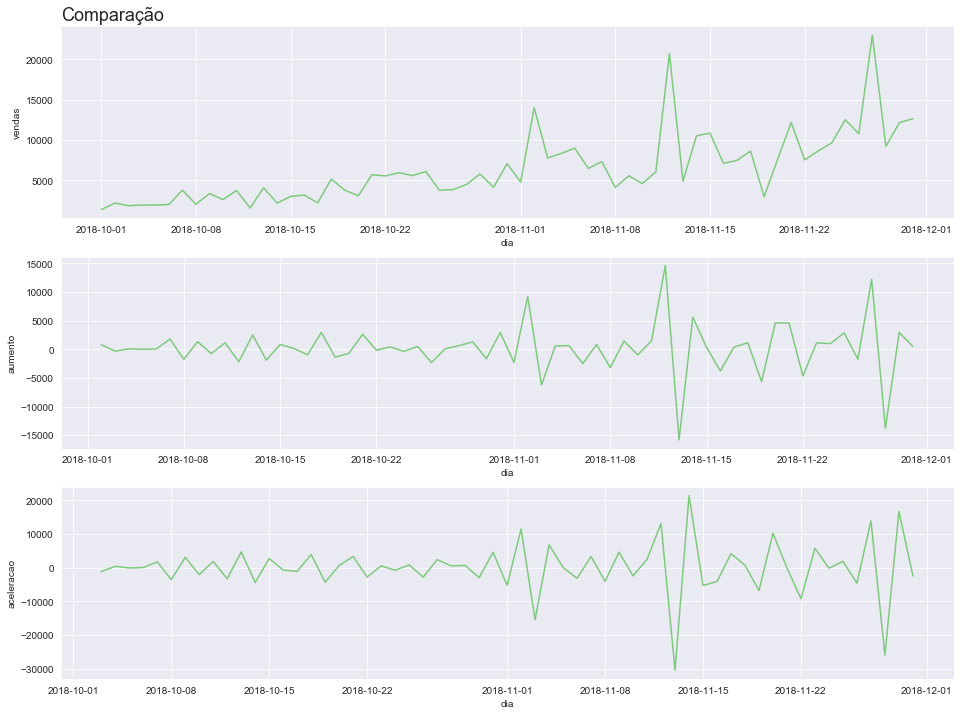

In [37]:

plot_comparacao('Comparação', 'dia', 'vendas', 'aumento', 'aceleracao', dataset = dados )

## Média Móvel

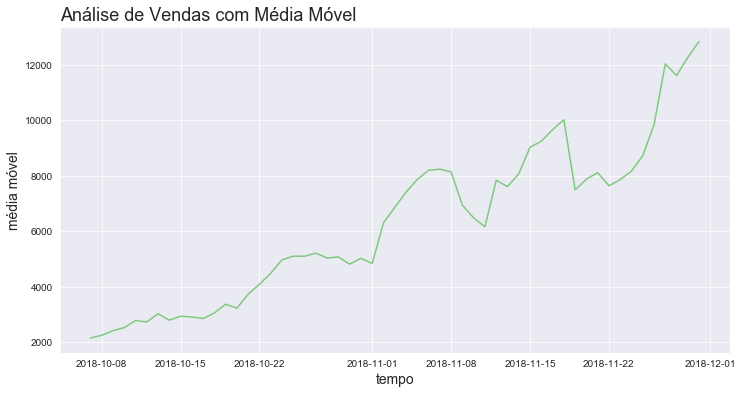

In [30]:
plotar('Análise de Vendas com Média Móvel', 'tempo', 'média móvel', 'dia', 'media_movel', dados)

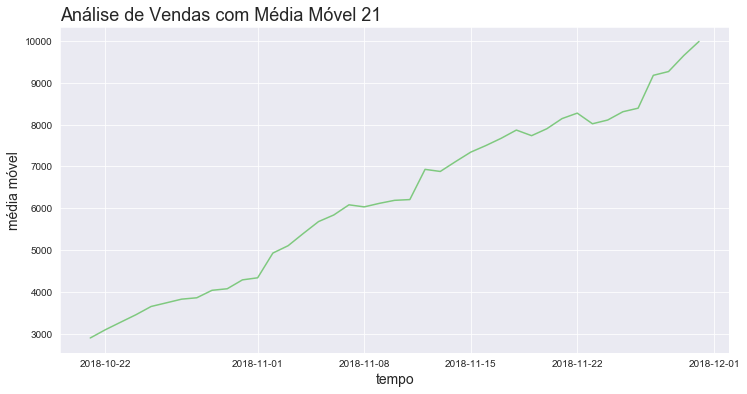

In [33]:
plotar('Análise de Vendas com Média Móvel 21', 'tempo', 'média móvel', 'dia', 'media_movel_21', dados)

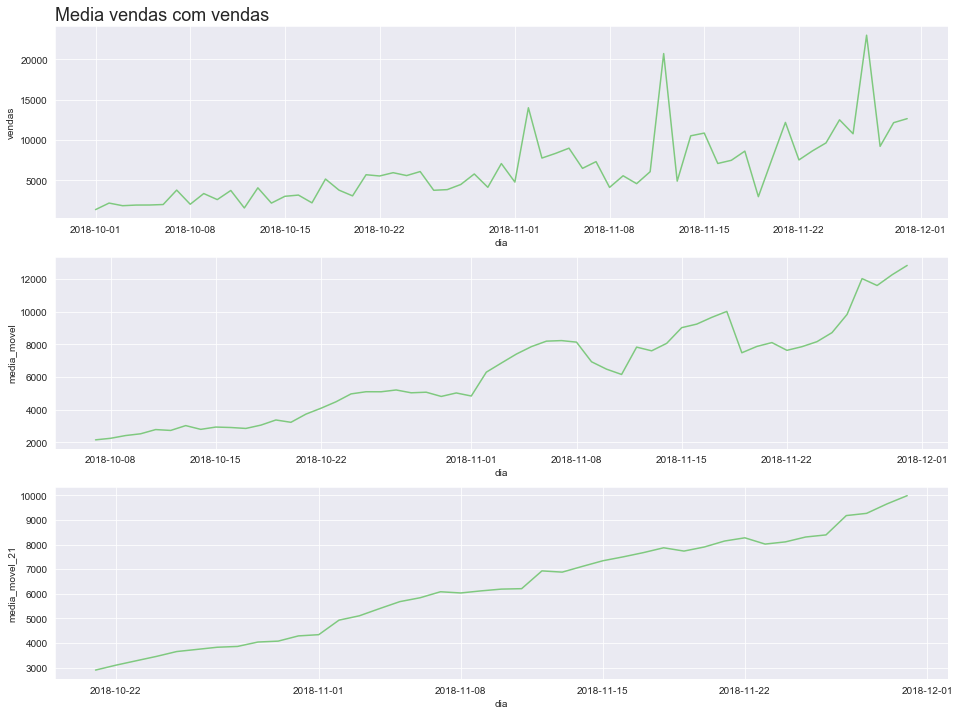

In [39]:
plot_comparacao('Media vendas com vendas', 'dia', 'vendas', 'media_movel', 'media_movel_21', dataset = dados)
